# Intro to Python: Part 2
> #### May 30, 2023
> #### Author: Ryan Seaman

#### In part 2, you will learn how to make some visualization plots with a sample dataset.

### 1. Load in the necessary packages.

> This is the equivalent to `library(packageName)` in R
> 
> Note that in order for this to work, the packages need to be installed onto the computer. The packages you will be using today have already been installed for you, but if there are other packages that you would like to use, you can use the following steps to install them.
> 1. Click the blue plus button in the top left of the window.
> 2. Select `terminal` in the "other" section. 
> 3. From here type the following command `pip install packageName` and press enter. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

### 2. Load in the data and Inspect
> Here, we can use the pandas (pd for short) command `read_csv` to read in our data and set it to the variable `df`. 

In [3]:
df = pd.read_csv("./data/sample_data.csv")

> Now the data is in a dataframe. This is a 2D table where each column can be of a different data type. You can take a look at the types of the columns with the following command: 

In [4]:
df.dtypes

strain        object
treatment     object
rep            int64
fluor        float64
dtype: object

> To get a preview of the dataframe in a variety of different options:
>
> `df`: This gives the first and last 5 rows.
> 
> `df.head()`: This gives a preview of the first 5 rows. You can specify a different number of rows as a parameter. For example df.head(10) will give 10 rows. 
>
> `df.tail()`: This gives a preview of the last 5 rows. You can specify a different number of rows as a parameter. For example df.tail(10) will give 10 rows. 
>
> `df[22:28]`: This gives a range of rows between the two numbers separated by a colon. Note that if you leave one of them blank, (i.e., `df[:8]`), it will include all of the rows until 8.

In [5]:
# Try one here


> Additionally, you can inspect a specific column by putting the column name inside of the square brackets. (i.e., `df["strain"]`). Note that the column name needs to be in quotes.

In [42]:
# Try a different column here


### 3. Plotting

**Plot 1:**
> Here, we will start with a basic boxplot.
> 
> Note: if there is a function that you do not understand, you can use the following command to learn more. Alternatively, you can google the documentation for that package and learn more about the function that way.
> 
> `help(nickname.function)`

> To start, we will define our plot style

In [55]:
sns.set_style('darkgrid') # This sets the style of our plot1 object to 'darkgrid'

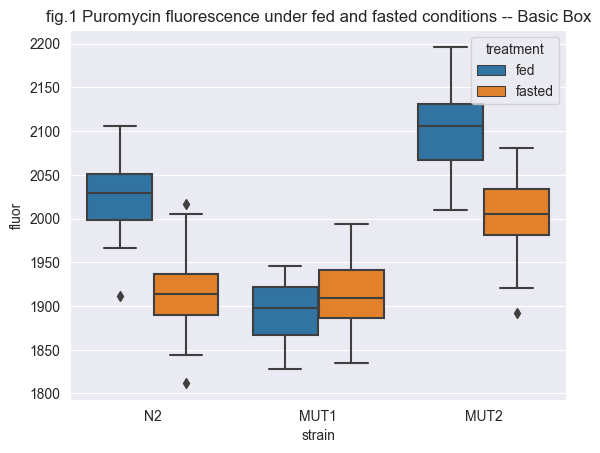

In [61]:
plot1 = sns.boxplot(x = 'strain', y='fluor',hue = 'treatment',data=df) # Now we create a boxplot object. 
plot1.set_title("fig.1 Puromycin fluorescence under fed and fasted conditions -- Basic Box") # With that object, we can make adjustments i.e., a Title
plot1 # By typing the name of the plot object on its own line, the plot will be displayed.

plt.savefig('./figures/basic_boxplot1.png') # Here we are saving the plot into the figures directory. 

**Plot 2**
> Here, with just a few small adjustments, we can change the plot from a boxplot to a violin plot.
>
> #### Can you identify the change?

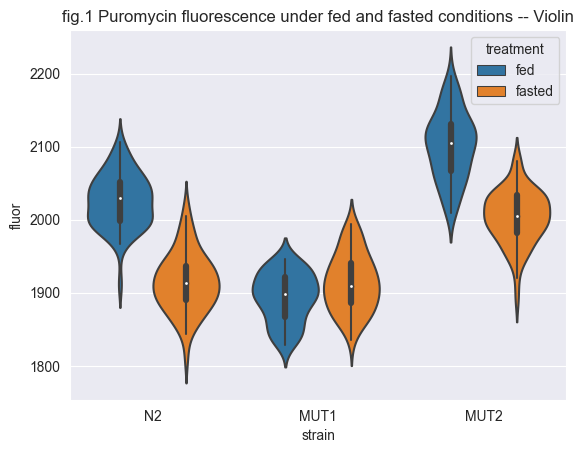

In [65]:
plot2 = sns.violinplot(x = 'strain', y='fluor',hue = 'treatment',data=df)
plot2.set_title("fig.1 Puromycin fluorescence under fed and fasted conditions -- Violin")
plot2

plt.savefig('./figures/basic_violinplot.png')

**Plot 3**
> Here, we have added some additional complexity to the boxplots. Note that we have the capability to plot multiple things on top of each other. 

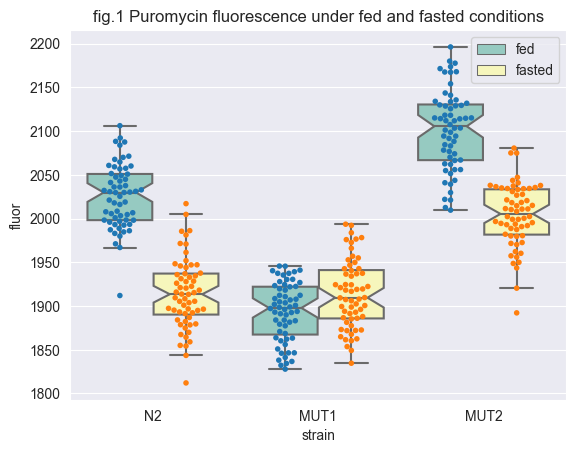

In [78]:
plot3 = sns.boxplot(x = 'strain', y='fluor',hue = 'treatment',data=df, showfliers = False, palette="Set3",notch = True, showcaps = True)
plot3 = sns.swarmplot(x = 'strain', y='fluor',hue = 'treatment',data=df, dodge =True, s=4)
handles, labels = plot3.get_legend_handles_labels()
plot3 
plt.legend(handles[0:2], labels[0:2])
plt.title("fig.1 Puromycin fluorescence under fed and fasted conditions")
plt.savefig('./figures/boxplotScatter.png')

**Plot 4**
> Finally, we can also add additional statistical tests between different groups. 
>

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MUT1_fed vs. MUT1_fasted: t-test independent samples with Bonferroni correction, P_val:2.723e-02 t=-3.028e+00
N2_fed vs. N2_fasted: t-test independent samples with Bonferroni correction, P_val:5.044e-30 t=1.584e+01
MUT2_fed vs. MUT2_fasted: t-test independent samples with Bonferroni correction, P_val:1.607e-23 t=1.298e+01
N2_fed vs. MUT1_fed: t-test independent samples with Bonferroni correction, P_val:4.308e-40 t=2.068e+01
MUT1_fed vs. MUT2_fed: t-test independent samples with Bonferroni correction, P_val:1.044e-53 t=-2.845e+01
N2_fasted vs. MUT1_fasted: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.145e-01
MUT1_fasted vs. MUT2_fasted: t-test independent samples with Bonferroni correction, P_val:9.202e-24 t=-1.308e+01
N2_fed vs. MUT2_fed: t-test independent samples with Bonferro

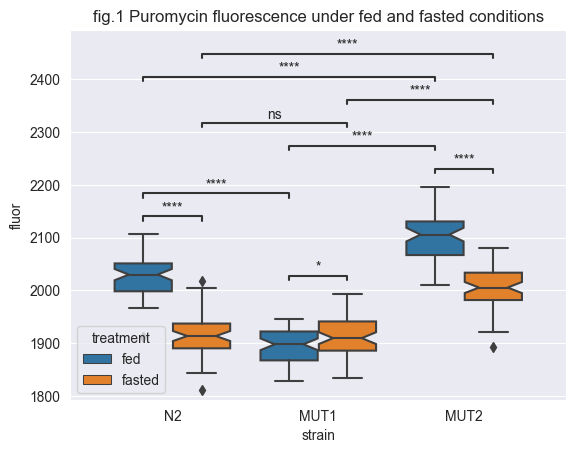

In [69]:
plot4 = sns.boxplot(x = 'strain', y='fluor',hue = 'treatment',data=df, notch = True, showcaps = True)
pairs = [
    [("N2","fed"),("N2","fasted")], 
    [("MUT1","fed"),("MUT1","fasted")], 
    [("MUT2","fed"),("MUT2","fasted")],
    
    [("N2","fed"),("MUT1","fed")], 
    [("N2","fed"),("MUT2","fed")], 
    [("MUT1","fed"),("MUT2","fed")],

    [("N2","fasted"),("MUT1","fasted")], 
    [("N2","fasted"),("MUT2","fasted")], 
    [("MUT1","fasted"),("MUT2","fasted")]
]


annotator = Annotator(plot4, data=df, x='strain', y='fluor', hue = 'treatment',pairs = pairs)
annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction="bonferroni")
annotator.apply_and_annotate()


plt.title("fig.1 Puromycin fluorescence under fed and fasted conditions")
plt.savefig('./figures/stat_boxplot.png')

### At this point, you have the foundational knowledge to create plots for your own project using Python. 

#### Below are some more helpful resources for data science using python:
> Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/index.html
>
> Intro to Numpy: https://numpy.org/doc/1.25/user/absolute_beginners.html
>
> Intro to Pandas: https://pandas.pydata.org/docs/user_guide/10min.html
>
> Seaborn Documentation: https://seaborn.pydata.org/api.html
>
> StatAnnotations Documentation: https://statannotations.readthedocs.io/en/latest/modules.html


## And remember, Google is your friend. Use it!